In [213]:
NAME = "64cl_sv_p45.h5" #11-vortex case 6422JO-1.70c12-1.h5 ; 7-vortex case #4822W-1, 11-vortex case 6422JO-1.70c19-1.h5 ; 4822J1, 4822J, 4822JL-1, 4822JL-10, 64MJO-1.70c19.h5
#################
NAME = NAME.split("/")
if 'simulations' in NAME:
    NAME.remove("simulations")
    NAME="/".join(NAME)
if isinstance(NAME, list):
    NAME = "/".join(NAME)
NAME = NAME.split(".")
if "h5" in NAME:
    NAME.remove("h5")
    NAME=".".join(NAME)
if isinstance(NAME, list):
    NAME = ".".join(NAME)
    

PATH = "./simulations/" + NAME
if(os.path.isdir(NAME)):
    print("Enter a valid file name")
else:
    PATH += ".h5"
    data = dataProcessing(PATH)
data.printHamiltonian()

b'float'
SELF CONSISTENT [GAUGE, HARTREE]  ==> [True, False]
The current simulation does not export HoppingFields
Note: Magnetic free energy density not added to free energy density because defined on plaquettes
COMMON VARIABLES:
T    ==>  0.26431718468666077
q    ==>  0.800000011920929
Bext ==>  (0., 0., 0.)
Emax ==>  21.020000457763672
[Component 1, Component 2]
t_x  ==>  [1.+0.j 1.+0.j]
t_y  ==>  [1.+0.j 1.+0.j]
mu   ==>  [0. 0.]
h    ==>  [0. 0.]
Coupling matrix V:
 2.5  0.01  
0.01   2.2  
Inverse of V:
   0.400007  -0.00181821  
-0.00181821     0.454554  
detV ==> 5.49990011921376


In [214]:
data.FreeEnergy

-68458.06407179339

Ground state : -68458.57786582015 


Single_vortex : -68458.32691621946 


5 vortices : -68457.2051209075


7 vortices : -68456.68129294932


11 vortices : -68455.57869209434 

18 vortices : -68453.70889779033

In [215]:
-68458.32691621946 - (-68458.57786582015)

0.25094960068236105

In [216]:
(-68457.09457813973 - (-68458.57786582015)) / 5

0.29665753608278467

In [217]:
(-68456.57174252867 - (-68458.57786582015)) / 7

0.28658904163915266

In [218]:
(-68456.27200282918 - (-68458.57786582015)) / 8

0.2882328738705837

In [219]:
(-68455.98185543863 - (-68458.57786582015)) / 9

0.288445597946217

In [220]:
(-68455.4828660854 - (-68458.57786582015)) / 11

0.28136361224989576

In [221]:
(-68453.71064766783 - (-68458.57786582015)) / 18

0.270401008461906

In [222]:
file_name = NAME

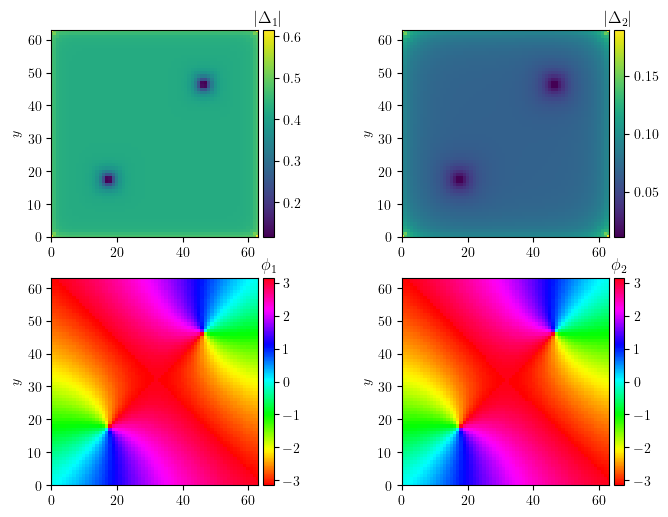

In [223]:
data.plotDelta22(save=file_name+'delta')

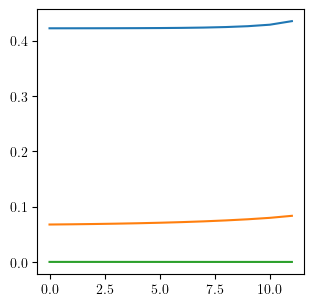

In [224]:
edge = 2
cp = 50
plt.plot(np.abs(data.D_1)[32, cp:-edge])
plt.plot(np.abs(data.D_2)[32, cp:-edge])
plt.plot(np.abs(data.B)[32, cp:-edge+1])


In [225]:
d_1 = np.abs(data.D_1)[30, cp:-edge]
d_2 = np.abs(data.D_2)[30, cp:-edge]
f_b = np.abs(data.B)[30, cp:-edge + 1]

In [226]:
def fit_f(x, a, b, c):
    return a + b * np.exp(-c * x)

In [37]:
x = np.arange(len(d_1))

In [25]:
paramsd1, errd1 = sp.optimize.curve_fit(fit_f, x, d_1)
paramsd2, errd2 = sp.optimize.curve_fit(fit_f, x, d_2)
paramsfb, errfb = sp.optimize.curve_fit(fit_f, x, f_b)

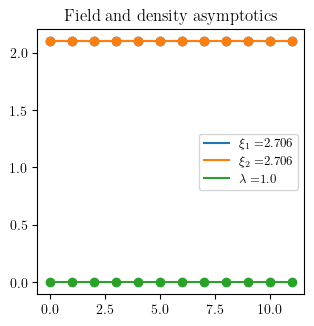

In [26]:
plt.scatter(x, d_1)
plt.plot(x, fit_f(x, *paramsd1), label = r'$\xi_1=$' + '{:.4}'.format(1 / paramsd1[-1]))
plt.scatter(x, d_2)
plt.plot(x, fit_f(x, *paramsd2), label = r'$\xi_2=$' + '{:.4}'.format(1 / paramsd2[-1]))
plt.scatter(x, f_b)
plt.plot(x, fit_f(x, *paramsfb), label = r'$\lambda=$' + '{:.4}'.format(1 / paramsfb[-1]))
plt.title('Field and density asymptotics')
plt.legend()
#plt.savefig('lambda_and_xi.pdf')
plt.show()

/tmp/ipykernel_5390/390746770.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot((np.abs(data.B)[30, 7:-7]) / np.max(np.abs(data.B)[30, 7:-7]))


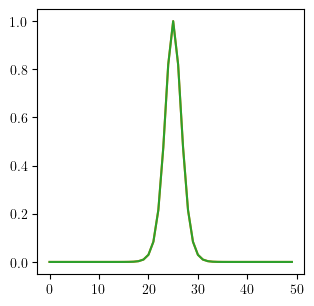

In [27]:
plt.plot((np.abs(data.B)[30, 7:-7]) / np.max(np.abs(data.B)[30, 7:-7]))
plt.plot(((np.max(np.abs(data.D_1)[29, 7:-7])) - np.abs(data.D_1)[29, 7:-7]) / np.max( np.max(np.abs(data.D_1)[29, 7:-7])- np.abs(data.D_1)[29, 7:-7]))
plt.plot(((np.max(np.abs(data.D_2)[29, 7:-7])) - np.abs(data.D_2)[29, 7:-7]) / np.max( np.max(np.abs(data.D_2)[29, 7:-7])- np.abs(data.D_2)[29, 7:-7]))

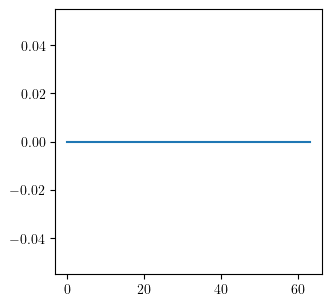

In [28]:
plt.plot(np.sqrt(np.abs(data.Jx) ** 2 + np.abs(data.Jy) ** 2)[28])

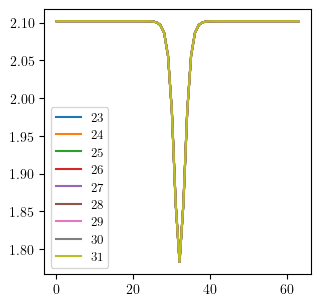

In [29]:
for i in range(23, 32):
    plt.plot(np.abs(data.D_2)[30], label=i)
plt.legend()
plt.show()

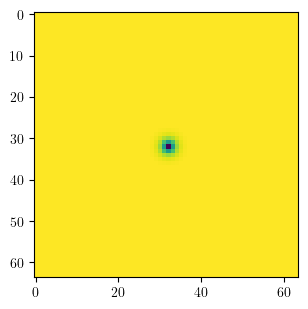

In [30]:
plt.imshow(np.abs(data.D_2))

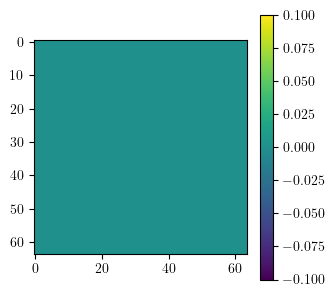

In [ ]:
plt.imshow(data.mod/data.hamiltonian.Emax) 
plt.colorbar()

plt.savefig(file_name + 'mu.pdf')

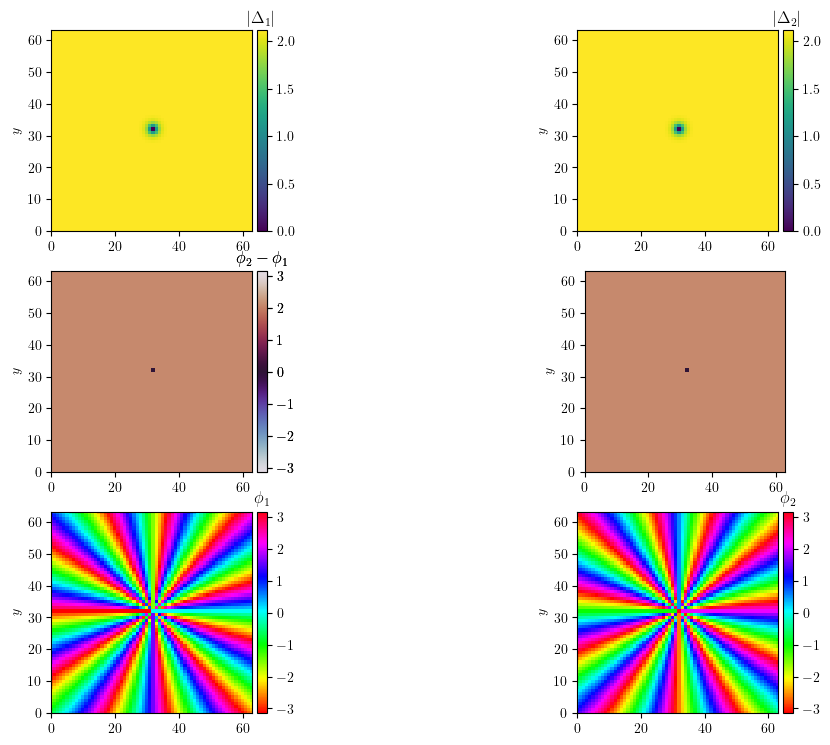

In [ ]:
data.plotInitialGuess(save=file_name+'ig')

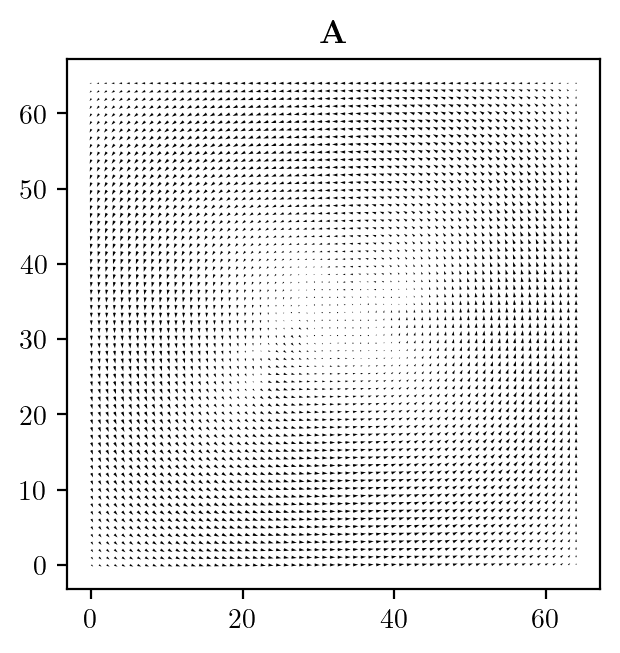

In [ ]:
data.plotA()

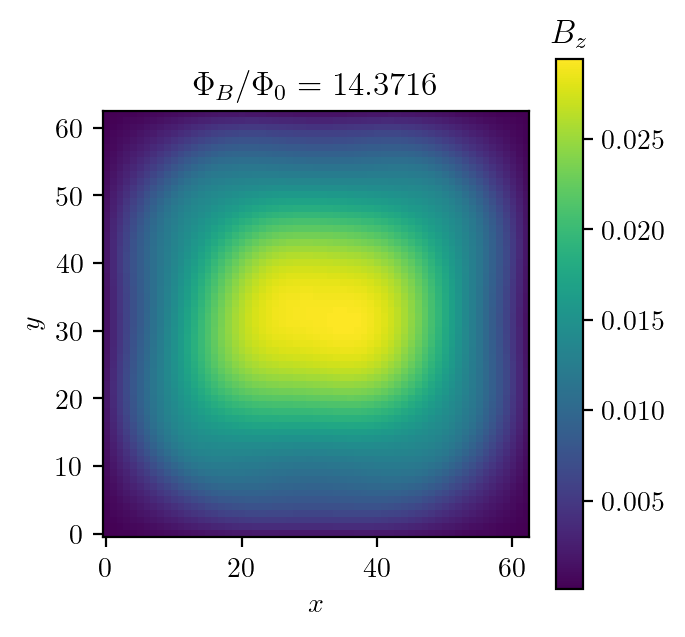

In [ ]:
data.plotB(save=file_name+'B')

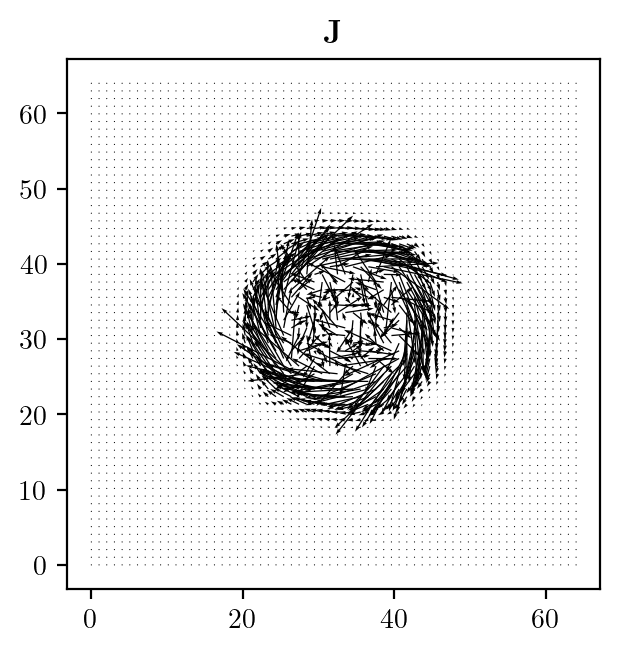

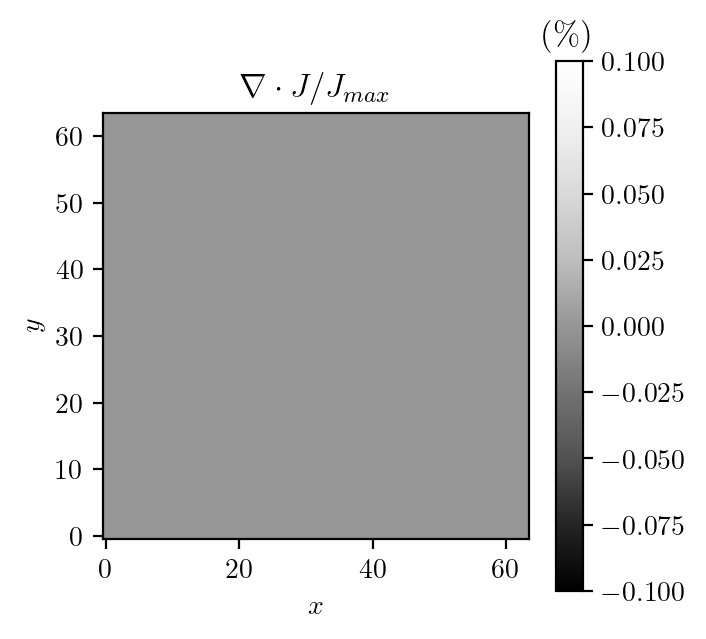

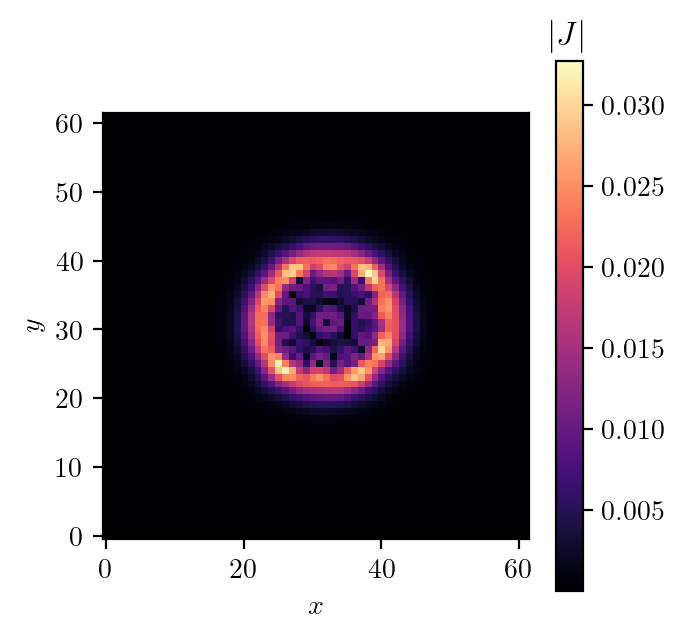

In [17]:
data.plotJ(0.002, save=file_name+'J')

In [662]:
data.FreeEnergy

-67451.49963892861

In [286]:
import tensorflow as tf
import networkx as nx

2024-02-19 15:06:21.397382: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-19 15:06:21.602589: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 15:06:22.153394: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [287]:
class ScSquareNC:
    def __init__(self, sample_size, mu,
                 init_deltas=None,
                 is_periodic=False,
                 dt=tf.dtypes.complex128):
        self.sample_size = sample_size
        self.N = int(tf.math.reduce_prod(sample_size))
        self.mu = mu
        self.dt = dt
        self.is_periodic = is_periodic
        self._gen_sample()

    def _gen_sample(self):
        g1 = nx.grid_graph([range(el) for el in list(self.sample_size)]
                           + [range(1)],
                           periodic=self.is_periodic)
        for edge in g1.edges(data=True):
            edge[2]['weight'] = 1

        i = 0
        for node in g1:
            g1.add_edge(node, node, weight=-self.mu[0, i])
            i += 1

        g2 = nx.grid_graph([range(el) for el in list(self.sample_size)]
                           + [range(1, 2)],
                           periodic=self.is_periodic)

        for edge in g2.edges(data=True):
            edge[2]['weight'] = -1

        i = 0
        for node in g2:
            g2.add_edge(node, node, weight=self.mu[1, i])
            i += 1

        latt = nx.compose(g1, g2)
        self.sample = latt
        self.hamiltonian = tf.constant(nx.to_numpy_array(self.sample),
                                                         dtype=self.dt)


    @tf.function()
    def exact_diag_coeff(self, n_phases, n_samples, norm, deltas=None):
        N = self.N
        dt = self.dt
        batch_size = tf.constant((n_samples, n_phases))
        (sample_ind,
        phase_ind,
        site_ind) = tf.meshgrid(tf.range(n_samples),
                                tf.range(n_phases),
                                tf.range(N), indexing='ij')
        mult_ham = tf.tensordot(tf.ones(batch_size, dtype=dt),
                                self.hamiltonian, axes=0)
        mult_ind_up = tf.transpose(tf.stack((sample_ind,
                                             phase_ind,
                                             site_ind,
                                             site_ind + N)),
                                   perm=(1, 2, 3, 0))
        mult_ind_down = tf.transpose(tf.stack((sample_ind,
                                               phase_ind,
                                               site_ind + N,
                                               site_ind)),
                                     perm=(1, 2, 3, 0))
        deltas_size = tf.constant((n_samples, n_phases, N))
        mult_ham = tf.tensor_scatter_nd_update(mult_ham, mult_ind_up,
                                               tf.math.conj(deltas))
        mult_ham = tf.tensor_scatter_nd_update(mult_ham, mult_ind_down,
                                               deltas)
        e, v = tf.linalg.eigh(mult_ham)
        return e, v

In [288]:
def df(E, T, Emax, V):
    return -np.exp((E + V) / T * Emax / 4) / T * Emax / 4 / (1 + np.exp((E + V) / T * Emax / 4)) ** 2

In [289]:
def tunneling_im_calc_step_1(data):
    system = ScSquareNC(data.D_1.shape, np.zeros((3, *data.D_1.shape)).reshape((3, -1)))
    deltas = np.array([[data.D_1.flatten(), data.D_2.flatten()]], dtype=np.complex128)
    Emax = data.hamiltonian.Emax
    N = len(data.D_1.flatten())
    e_full, v_full = system.exact_diag_coeff(2, 1, Emax, deltas=deltas)
    v, u = v_full[:, :, N:, N:], v_full[:, :, :N, N:]
    e_1, e_2 = e_full[:, :, N:], e_full[:, :, N:]
    return v, u, e_1, e_2, Emax

def tunneling_im_calc_step_2(u, v, e_1, e_2, T, Emax, V=0):
    dIdV0 = -tf.math.reduce_sum(tf.math.abs(u)[0, 0] ** 2 * df(tf.math.abs(e_1), T, Emax, V)[0, 0] +
                              tf.math.abs(v)[0, 0] ** 2 * df(tf.math.abs(e_2), T, Emax, -V)[0, 0], axis=-1)
    dIdV1 = -tf.math.reduce_sum(tf.math.abs(u)[0, 1] ** 2 * df(tf.math.abs(e_1), T, Emax, V)[0, 1] +
                              tf.math.abs(v)[0, 1] ** 2 * df(tf.math.abs(e_2), T, Emax, -V)[0, 1], axis=-1)

    return (dIdV0 + dIdV1 ).numpy().reshape(64, 64)

In [290]:
v, u, e_1, e_2, Emax = tunneling_im_calc_step_1(data)

2024-02-19 15:06:23.410006: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-19 15:06:23.478162: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-19 15:06:23.478310: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [291]:
4096 ** 0.5

64.0

In [292]:
tun_cond = tunneling_im_calc_step_2(v, u, e_1, e_2, data.hamiltonian.T, Emax, V=0.2)

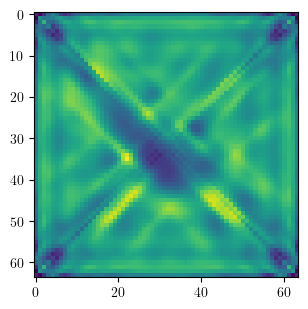

In [293]:
plt.imshow(tun_cond)
#plt.savefig('images/fracU1_v_V=0.pdf')
plt.show()